## Traversal Funnels Power Law Fit

In [1]:
from collections import defaultdict

import powerlaw
import pandas as pd
from scipy import stats 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = "/Users/mark/Dropbox/Math/Complex_Systems/research/wikipedia-network/paper/writeup/graphics/"
results_path = "/Users/mark/Desktop/wiki_v4/"


In [2]:
#load funnels data
with open(results_path + "feed_count.json") as f:
    feeder_dict = json.load(f)
df = pd.DataFrame(feeder_dict.items())
df.columns = ['article', 'traversal funnels']
df = df.sort_values(by='traversal funnels', ascending=False)
df['rank'] = np.arange(1, df.shape[0]+1)

## Estimate Fit

In [3]:
powerlaw_fit_funnels = powerlaw.Fit(df['traversal funnels'], discrete=True)

print "alpha: ", powerlaw_fit_funnels.alpha
print "xmin: ", powerlaw_fit_funnels.xmin
print "gamma: ", 1 / powerlaw_fit_funnels.alpha + 1

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


alpha:  1.73451540213
xmin:  30.0
gamma:  1.576529905


In [4]:
print "Kolmogorov Distance: ", powerlaw_fit_funnels.D

Kolmogorov Distance:  0.0174111860863


In [5]:
1/1.73 + 1

1.5780346820809248

# Visualize Fit

## Log-Log

(0, 100000000.0)

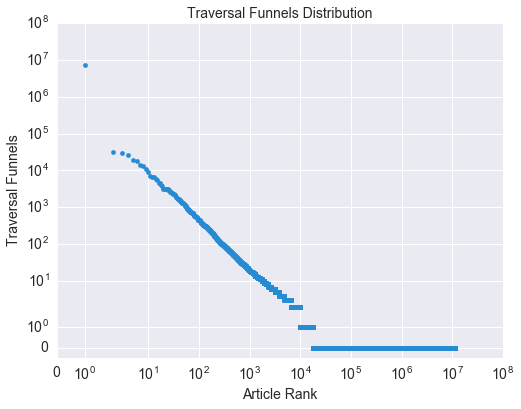

In [5]:
plt.figure(figsize=(8,6))

plt.scatter(df["rank"], df["traversal funnels"],  color="#268bd2")

plt.tick_params(axis='both', which='major', labelsize=14)

#change axis labeling to 10^#
axis = plt.gca()
axis.set_yscale('symlog')
axis.set_xscale('symlog')

plt.title("Traversal Funnels Distribution", fontsize=14)
plt.xlabel("Article Rank", fontsize=14)
plt.ylabel("Traversal Funnels", fontsize=14)

#extend axes
plt.gca().set_ylim(bottom=-0.5, top=10**(8))
plt.gca().set_xlim(left=0)


## Plot against Estimated Power Law 

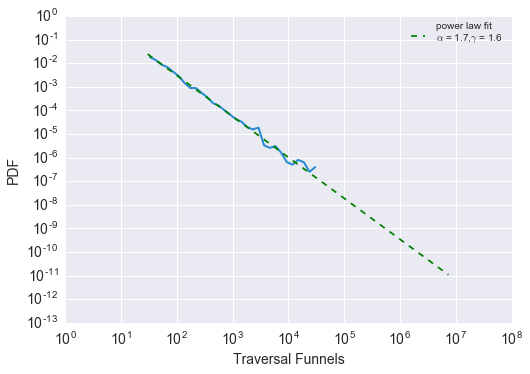

In [9]:
figCCDF = powerlaw_fit_funnels.plot_pdf(color='#268bd2', linewidth=2)
powerlaw_fit_funnels.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha$ = 1.7,' + r'$\gamma$ = 1.6')
plt.tick_params(axis='both', which='major', labelsize=14)

#extend axes
plt.gca().set_xlim(left=1, right=10**8)
plt.gca().set_ylim(top=1, bottom=10**(-13))

plt.legend(numpoints=2)
plt.ylabel("PDF", fontsize=14)
plt.xlabel("Traversal Funnels", fontsize=14)




## Combined Plot

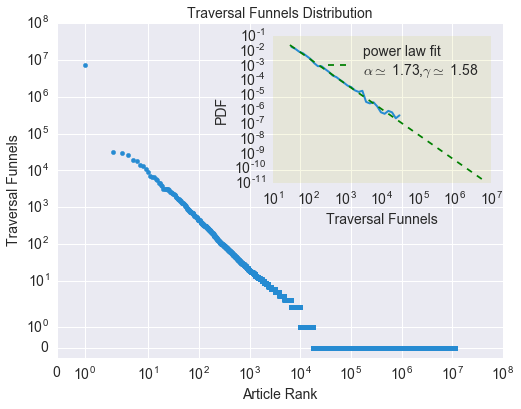

In [7]:
#defaults
sns.set()
plt.figure(figsize=(8,6))

plt.scatter(df["rank"], df["traversal funnels"],  color="#268bd2")

plt.tick_params(axis='both', which='major', labelsize=14)

#change axis labeling to 10^#
axis = plt.gca()
axis.set_yscale('symlog')
axis.set_xscale('symlog')

plt.title("Traversal Funnels Distribution", fontsize=14)
plt.xlabel("Article Rank", fontsize=14)
plt.ylabel("Traversal Funnels", fontsize=14)

#extend axes
plt.gca().set_ylim(bottom=-0.5, top=10**(8))
plt.gca().set_xlim(left=0)


sns.set_style("dark")
#subplot in top corner
a = plt.axes([.50, .53, .38, .34], axisbg='y')


figCCDF = powerlaw_fit_funnels.plot_pdf(color='#268bd2', linewidth=2)
powerlaw_fit_funnels.power_law.plot_pdf(color='g', linestyle='--', ax=figCCDF, 
                                       label="power law fit\n"+ r'$\alpha \simeq$ 1.73,' + r'$\gamma \simeq$ 1.58')
plt.tick_params(axis='both', which='major', labelsize=14)

a.set_xlim(right=10**7)

plt.xlabel("Traversal Funnels", fontsize=14)
plt.ylabel("PDF", fontsize=14)
plt.legend(numpoints=2, fontsize=14)


#transparent
a.patch.set_alpha(0.1)

#reset defaults
sns.set()

#save figure
plt.savefig(path+'funnels_distribution.png', format='png', dpi=300, bbox_inches='tight')


## Compare against Alternative Distributions

* R is the loglikelihood ratio
* p is the p-value based on a Kolmogorov-Smirnov Test

In [27]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'lognormal')
print "R: ", R
print "p: ", p

R:  0.00206262351764
p:  0.970837627964


In [28]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'exponential')
print "R: ", R
print "p: ", p

R:  3034.14528855
p:  5.3369163874e-06


In [29]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'stretched_exponential')
print "R: ", R
print "p: ", p

R:  90.1748988243
p:  1.80966398076e-08


In [30]:
R, p = powerlaw_fit_funnels.distribution_compare('power_law', 'truncated_power_law')
print "R: ", R
print "p: ", p

Assuming nested distributions


R:  -0.000643162999478
p:  0.971389695114
